#  <center>Assignment 1 by Andrey Vlasov </center>

***Deadline*: 23.59 13.10.18**

***Load Time: 01.15 14.10.18***

**The goal of the assignment** is to perform an intensive visual analysis of a real-life dataset and to find a good feature representation for the data.

**The original problem statement** was *to build an algorithm to classify* **time series** into one of two classes. 

The data sets contain approximately 5000 of time series (the size of the training subsample is 1320). 
- Each series consists of values for 500 time points and belongs to class {-1} or {1} (see column Target).

An addition to problem statement. The dataset design is similar to industrial problems described during the first lecture. Imagine that you are an engineer who is responsible for a particular unit within an aircraft. You have one sensor which registers a parameter related to operations of the unit each minute. One entry of the dataset is a set of these measurements for 500 minutes (e.g. for a single 500-minutes flight). You usually disassemble the unit after each flight and check its conditions. So, for each entry, you know either the unit normally operated (target 1) or there was abnormal behavior (target -1). Now you want to use data from the sensor to identify unit status without disassembling.

## Tasks:

1. Load train and test data using pandas or numpy. 2 points.


2. Plot & analyze several training examples of each class using plt.plot (from matplotlib import pyplot as plt). 3 points.


3. Propose several features potentially useful for classification (for example, the maximal absolute value of a time series). 5 points.


4. Calculate the proposed features using numpy and visualize (Links to an external site.)Links to an external site. the new representation of training examples (hint: ideally you will find a set of features with a small overlap between classes -1 and 1). 7 points.


5. Repeat steps 3-4 if needed.


6. Propose a simple decision rule using the proposed features (e.g. if feature_1 > 1 and feature_2 < 5 than class=-1). Estimate accuracy of classification using the test set. 3 points.

In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

### Task 1: loading train and test data (files are in the same folder as the notebook):

In [3]:
train = pd.read_csv('./hw1_train.csv')
test = pd.read_csv('./hw1_test.csv')
train.head(10)

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-1,-0.140400,0.17164,0.302040,0.23280,0.033853,-0.22418,-0.46999,-0.645400,-0.617700,...,-0.31997,0.390900,0.97483,1.258700,1.14330,0.647090,-0.049582,-0.690400,-0.97660,-0.79426
1,-1,0.334040,0.32225,0.453840,0.67185,0.887900,1.02050,1.05980,1.030300,0.950750,...,0.43519,-0.346500,-0.92491,-1.208700,-1.24800,-1.140000,-1.041800,-1.041800,-1.15960,-1.37570
2,-1,0.716690,0.74437,0.725910,0.66133,0.555220,0.41359,0.24658,0.065273,-0.121110,...,3.17100,2.276000,1.21950,0.081881,-1.05030,-2.092900,-2.983300,-3.675300,-4.13660,-4.33960
3,1,1.240300,1.33120,1.386600,1.38320,1.306000,1.14280,0.87861,0.532290,0.140020,...,-0.82026,-1.124600,-1.30200,-1.340600,-1.27140,-1.146400,-1.011300,-0.931220,-0.93450,-1.00130
4,-1,-1.159500,-1.20420,-1.167600,-1.03350,-0.818170,-0.55812,-0.29929,-0.093691,0.022770,...,0.66085,0.441440,0.20618,-0.006941,-0.14692,-0.183080,-0.112380,0.008987,0.13141,0.18627
5,1,0.659020,0.32579,0.019658,-0.22144,-0.393310,-0.51609,-0.60286,-0.661320,-0.706270,...,0.24442,0.045383,-0.16730,-0.382870,-0.59915,-0.786110,-0.913570,-0.932320,-0.81169,-0.55159
6,-1,-0.357040,-0.34950,-0.478710,-0.67790,-0.884630,-1.00200,-0.98154,-0.741430,-0.256900,...,0.25993,0.418210,0.40421,0.305150,0.15980,0.082486,0.122110,0.219020,0.26962,0.19748
7,-1,0.012008,0.75968,1.301100,1.56440,1.511800,1.21680,0.75547,0.345710,0.032022,...,-0.73609,-0.503290,-0.33897,-0.278930,-0.23153,-0.059515,0.343610,0.954550,1.64870,2.14380
8,1,-1.064300,-1.10270,-1.095800,-1.05370,-0.961710,-0.80527,-0.55537,-0.203580,0.204560,...,-0.87814,-1.131700,-1.25970,-1.253400,-1.11580,-0.870280,-0.558200,-0.232370,0.06438,0.31117
9,1,-1.196700,-0.93059,-0.608550,-0.23722,0.177140,0.61496,1.04970,1.444200,1.761800,...,-0.11264,0.162020,0.42344,0.656310,0.85193,1.011200,1.128800,1.190100,1.17520,1.06690


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Columns: 501 entries, Target to Time-499
dtypes: float64(500), int64(1)
memory usage: 5.0 MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Columns: 501 entries, Target to Time-499
dtypes: float64(500), int64(1)
memory usage: 13.8 MB


### Task 2: plotting and analysis the examples:

Divide the data into inputs and outputs:

In [6]:
X_train = train.drop('Target', axis = 1)
X_test = test.drop('Target', axis = 1)
y_train = train.Target
y_test = test.Target

Few graphs for different time series of different classes:

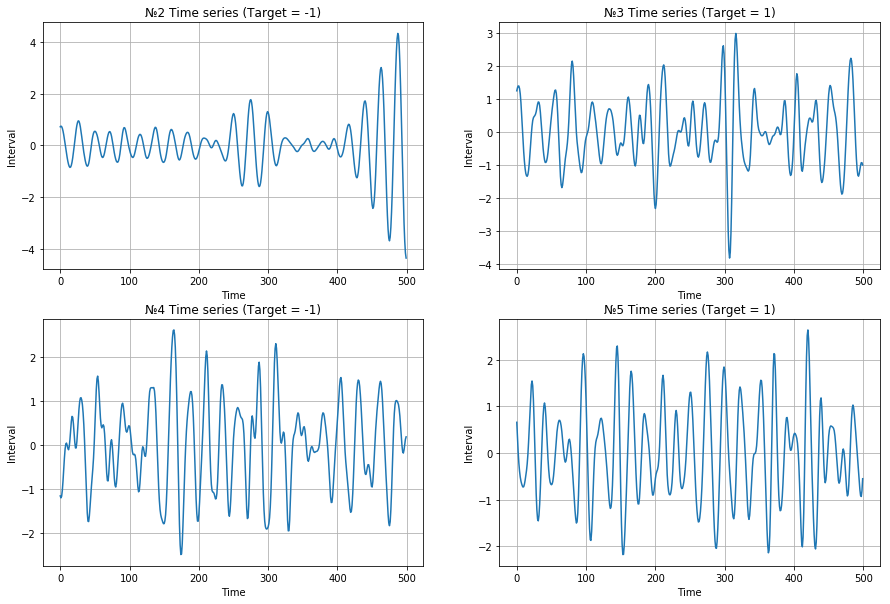

In [7]:
plt.figure(figsize = (15, 10))
for i in range(2, 6):  # 4 graphs for time series
    plt.subplot(2, 2, i - 1)
    plt.plot(np.arange(0, 500), X_train.iloc[i, :])
    plt.title('№{} Time series (Target = {})'.format(i, train.iloc[i, 0]))
    plt.xlabel('Time')
    plt.ylabel('Interval')
    plt.grid()

plt.show()

In [8]:
def plotly_df(df,start,finish, title = ''):
    data = []
    
    for i in range(start,finish):
        trace = go.Scatter(
            x=df.index,
            y=df.T[i],
            mode = 'lines',
            name = '№{} Time series  (Target = {})'.format(i, train.iloc[i, 0])
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [9]:
plotly_df(X_train,2,6,title="Time series")

In [10]:
plotly_df(X_train,0,10,title="Time series")

### Task 3 & 4: Let's define & visualize possible features and finally analyze them: 

Check **the simplest features**

In [11]:
# get vector for all the measurements
means = []
median = []
absmean = []
absmax = []
absmin = []
std = []
for i in range(len(X_train)):
    means.append(X_train.iloc[i, :].mean())
    median.append(X_train.iloc[i,:].median())
    absmean.append(abs(X_train.iloc[i, :]).mean())
    absmax.append(max(abs(X_train.iloc[i, :])))
    absmin.append(min(abs(X_train.iloc[i, :])))
    std.append(X_train.iloc[i, :].std())

In [12]:
data_check = pd.DataFrame()
data_check['Target'] = train.Target
data_check['Mean'] = means
data_check['Median'] = median
data_check['Abs mean'] = absmean
data_check['Max abs'] = absmax
data_check['Min abs'] = absmin
data_check['Std'] = std

In [13]:
data_check.head()

,Target,Mean,Median,Abs mean,Max abs,Min abs,Std
0,-1,-1.223200e-07,-0.001575,0.800966,3.1381,0.000998,1.000000
1,-1,-2.746000e-07,0.039186,0.819469,2.9076,0.004858,1.000002
2,-1,1.224000e-07,0.015263,0.636913,4.3396,0.002392,1.000000
3,1,7.515200e-07,-0.016962,0.775573,3.8144,0.000200,1.000000
4,-1,-1.228200e-06,0.046734,0.807177,2.6234,0.004787,1.000000


In [14]:
df_r = data_check[(data_check.Target == 1)]
df_m =  data_check[(data_check.Target == -1)]
df_m.head()

,Target,Mean,Median,Abs mean,Max abs,Min abs,Std
0,-1,-1.223200e-07,-0.001575,0.800966,3.1381,0.000998,1.000000
1,-1,-2.746000e-07,0.039186,0.819469,2.9076,0.004858,1.000002
2,-1,1.224000e-07,0.015263,0.636913,4.3396,0.002392,1.000000
4,-1,-1.228200e-06,0.046734,0.807177,2.6234,0.004787,1.000000
6,-1,-3.983678e-07,-0.005267,0.786952,3.1843,0.000009,0.999998


In [15]:
def plotly_compare_df(df_r,df_m,column=''):
    data = []

    trace0 = go.Bar(
        x=df_r.index,
        y=df_r[column],
        name='Target {1} '
    )

    trace1 = go.Bar(
        x=df_m.index,
        y=df_m[column],
        name='Target {-1} '
    )

    data = [trace0, trace1]
    layout = dict(title = column)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [16]:
plt.figure(figsize = (10, 10))
plotly_compare_df(df_r,df_m,column='Mean')

<Figure size 720x720 with 0 Axes>

In [17]:
plotly_compare_df(df_r,df_m,column='Median')

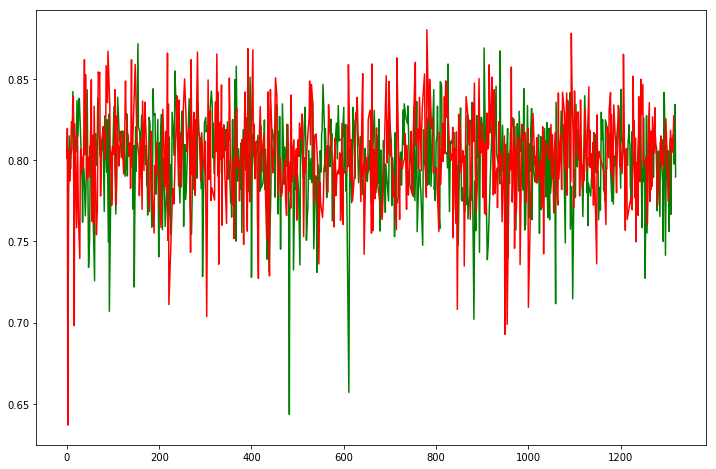

In [18]:
df_r['Abs mean'].plot(color='green')
df_m['Abs mean'].plot(color='red')

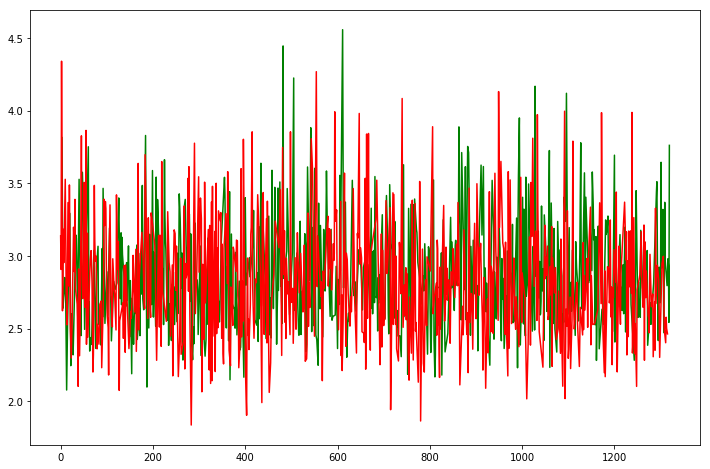

In [19]:
df_r['Max abs'].plot(color='green')
df_m['Max abs'].plot(color='red')

In [20]:
plotly_compare_df(df_r,df_m,column='Min abs')

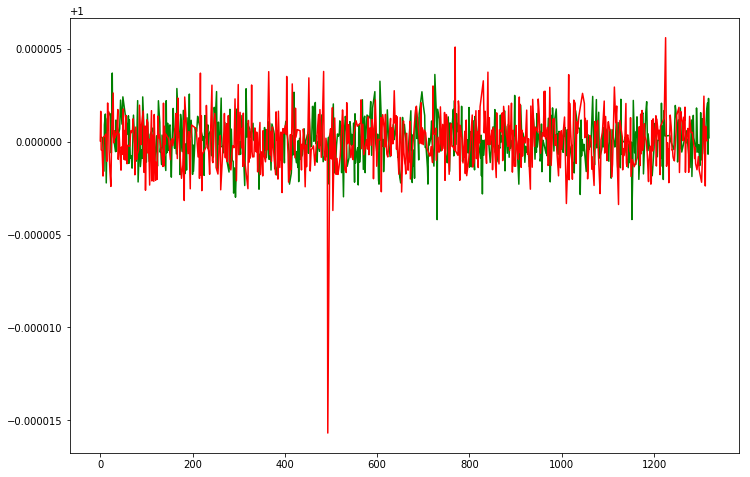

In [21]:
df_r.Std.plot(color='green')
df_m.Std.plot(color='red')

### As we can see these features don't show rigth result.

##  Repeat steps 3-4

### *Hypothesis: May be number of peaks will influence on right target because when device makes mistake target, it works randomly.*

In [22]:
# A peak is more than its n neighbours to the left and to the rigth
def number_of_peaks(x,n):
    x_reduced=x[n:-n]
    res=None
    for i in range(1,n+1):
        result_first=(x_reduced>np.roll(x,i)[n:-n])
        if res is None:
            res=result_first
        else:
            res &=result_first
        res &=(x_reduced>np.roll(x,-1)[n:-n])
    return np.sum(res)

In [23]:
n_peak_1 = number_of_peaks(X_train.T,1)
n_peak_5 = number_of_peaks(X_train.T,5)

In [24]:
data_check = pd.DataFrame()
data_check['Target'] = train.Target
data_check['n_peak_1'] = n_peak_1
data_check['n_peak_5'] = n_peak_5
data_check.head()

,Target,n_peak_1,n_peak_5
0,-1,171,69
1,-1,187,68
2,-1,164,40
3,1,142,59
4,-1,176,83


In [25]:
df_r = data_check[(data_check.Target == 1)]
df_m =  data_check[(data_check.Target == -1)]
df_m.head()

,Target,n_peak_1,n_peak_5
0,-1,171,69
1,-1,187,68
2,-1,164,40
4,-1,176,83
6,-1,148,85


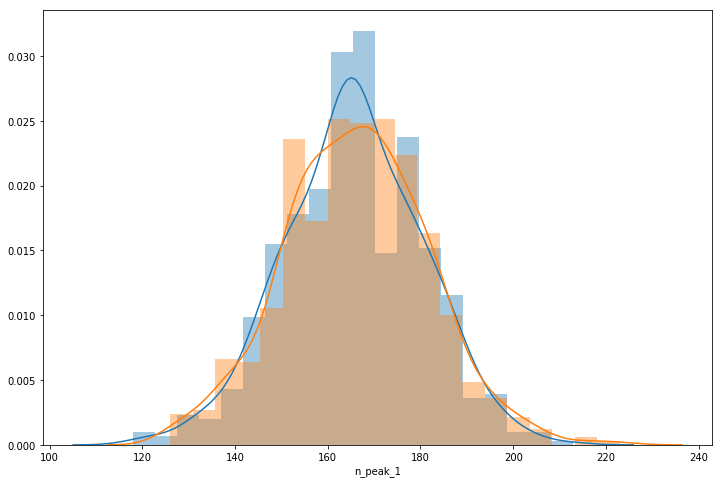

In [26]:
sns.distplot(df_r.n_peak_1)
sns.distplot(df_m.n_peak_1)

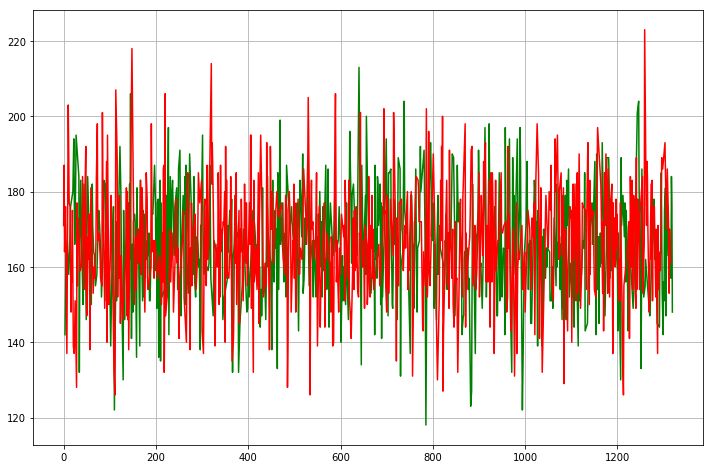

In [27]:
df_r['n_peak_1'].plot(color='green')
df_m['n_peak_1'].plot(color='red')
plt.grid()

#### Bad result, try to use another one

The general approach is to smooth vector by convolving it with wavelet(width) for each width in widths. Relative maxima which appear at enough length scales, and with sufficiently high SNR, are accepted.

In [28]:
from scipy.signal import cwt,find_peaks_cwt,ricker,welch

In [29]:
def number_cwt_peaks(df,n):
    number_cwt = []
    a = df.T
    for i in range(a.shape[1]):
        number_cwt.append(len(find_peaks_cwt(vector=a.iloc[:,i], widths=np.array(list(range(1, n + 1))), wavelet=ricker)))
    number_cwt = np.asarray(number_cwt)
    s = pd.Series(number_cwt,index=df.index)
    return s

In [30]:
cwt_1 =number_cwt_peaks(X_train,n=1)

In [31]:
cwt_2 = number_cwt_peaks(X_train,n=2)

In [32]:
data_check = pd.DataFrame()
data_check['Target'] = train.Target
data_check['number cwt peaks 1'] = cwt_1
data_check['number cwt peaks 2'] = cwt_2
data_check.head()

,Target,number cwt peaks 1,number cwt peaks 2
0,-1,26,31
1,-1,32,38
2,-1,14,19
3,1,19,28
4,-1,17,26


In [33]:
df_r = data_check[(data_check.Target == 1)]
df_m =  data_check[(data_check.Target == -1)]
df_m.head()

,Target,number cwt peaks 1,number cwt peaks 2
0,-1,26,31
1,-1,32,38
2,-1,14,19
4,-1,17,26
6,-1,21,27


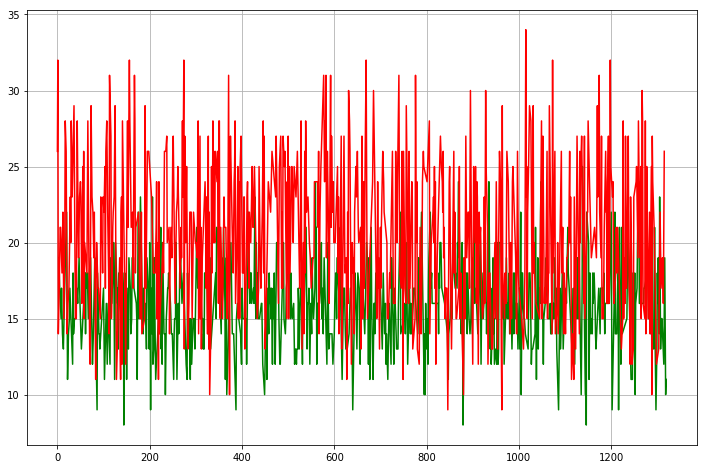

In [34]:
df_r['number cwt peaks 1'].plot(color='green')
df_m['number cwt peaks 1'].plot(color='red')
plt.grid()

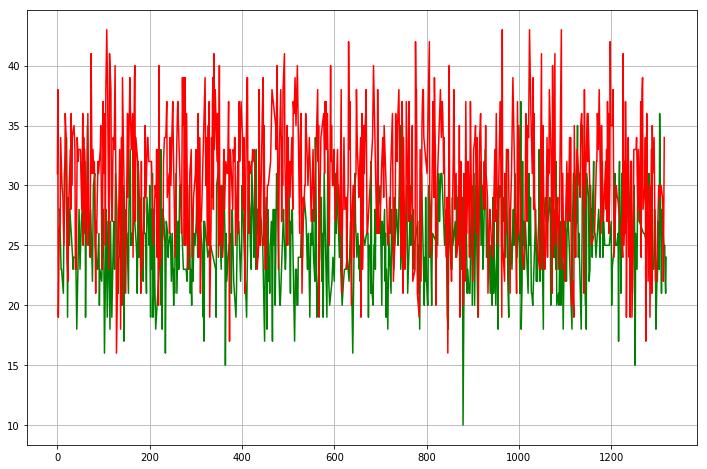

In [35]:
df_r['number cwt peaks 2'].plot(color='green')
df_m['number cwt peaks 2'].plot(color='red')
plt.grid()

In [36]:
df_r['number cwt peaks 1'].describe()

count    639.000000
mean      15.802817
std        2.943340
min        8.000000
25%       14.000000
50%       16.000000
75%       18.000000
max       25.000000
Name: number cwt peaks 1, dtype: float64

In [37]:
df_m['number cwt peaks 1'].describe()

count    681.000000
mean      20.610866
std        5.007917
min        9.000000
25%       17.000000
50%       20.000000
75%       25.000000
max       34.000000
Name: number cwt peaks 1, dtype: float64

In [38]:
print(df_r[(df_r['number cwt peaks 1'] <= 18)].shape[0]/df_r.shape[0],
     df_m[(df_m['number cwt peaks 1'] > 18) ].shape[0]/df_m.shape[0])

0.8325508607198748 0.6226138032305433


In [39]:
df_r['number cwt peaks 2'].describe()

count    639.000000
mean      25.181534
std        3.822664
min       10.000000
25%       23.000000
50%       25.000000
75%       28.000000
max       37.000000
Name: number cwt peaks 2, dtype: float64

In [40]:
df_m['number cwt peaks 2'].describe()

count    681.000000
mean      30.558003
std        5.425696
min       16.000000
25%       26.000000
50%       31.000000
75%       34.000000
max       43.000000
Name: number cwt peaks 2, dtype: float64

In [41]:
print(df_r[(df_r['number cwt peaks 2'] <= 28)].shape[0]/df_r.shape[0],
     df_m[(df_m['number cwt peaks 2'] > 28) ].shape[0]/df_m.shape[0])

0.8200312989045383 0.6490455212922174


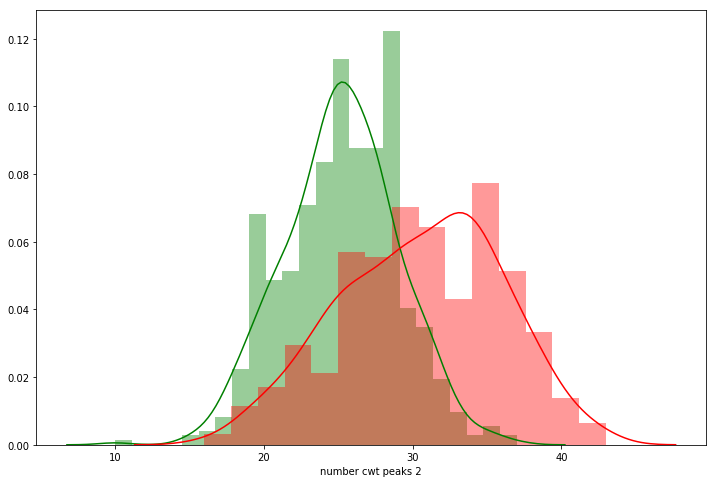

In [42]:
sns.distplot(df_r['number cwt peaks 2'],color='green')
sns.distplot(df_m['number cwt peaks 2'],color='red')

good job but it is not enough!

### *New Hypothesis: If our sensor work incorrectly then it will doubled wrong points because sensor don't detect simething and record only noise*

In [43]:
data_check['unique']= X_train.nunique(axis=1)

In [44]:
data_check.head()

,Target,number cwt peaks 1,number cwt peaks 2,unique
0,-1,26,31,443
1,-1,32,38,418
2,-1,14,19,442
3,1,19,28,500
4,-1,17,26,423


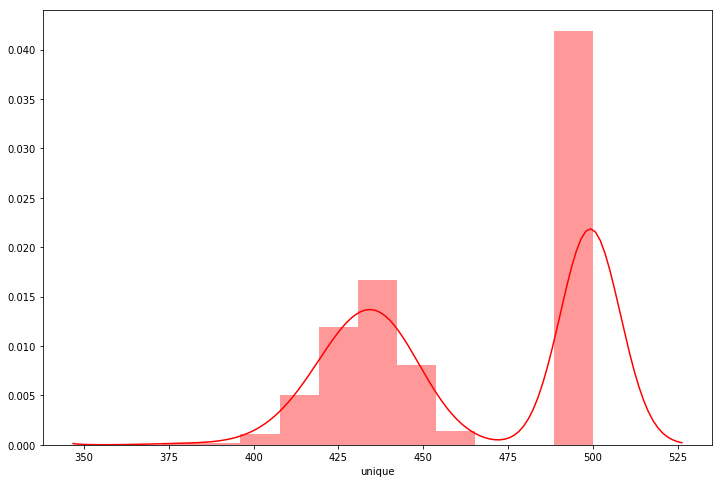

In [45]:
sns.distplot(data_check.unique,color='red')

In [46]:
df_r = data_check[(data_check.Target == 1)]
df_m =  data_check[(data_check.Target == -1)]
df_m.head()

,Target,number cwt peaks 1,number cwt peaks 2,unique
0,-1,26,31,443
1,-1,32,38,418
2,-1,14,19,442
4,-1,17,26,423
6,-1,21,27,437


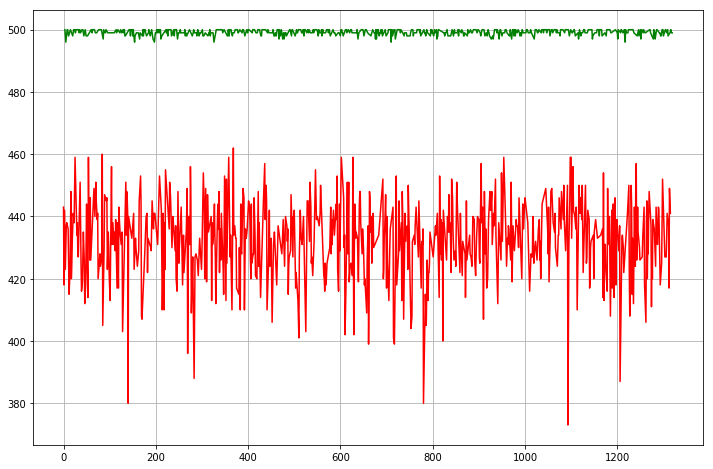

In [47]:
df_r['unique'].plot(color='green')
df_m['unique'].plot(color='red')
plt.grid()

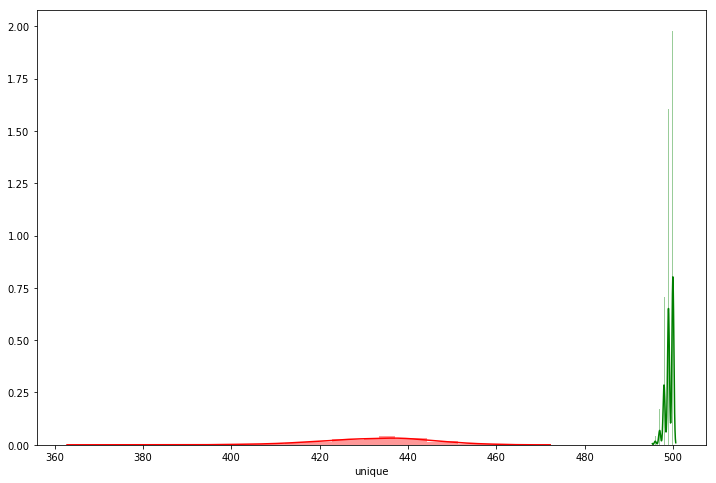

In [48]:
sns.distplot(df_r.unique,color='green')
sns.distplot(df_m.unique,color='red')

In [49]:
df_r['unique'].describe()

count    639.000000
mean     499.179969
std        0.894343
min      496.000000
25%      499.000000
50%      499.000000
75%      500.000000
max      500.000000
Name: unique, dtype: float64

In [50]:
df_m['unique'].describe()

count    681.000000
mean     432.381791
std       12.797905
min      373.000000
25%      425.000000
50%      434.000000
75%      441.000000
max      462.000000
Name: unique, dtype: float64

In [51]:
print(df_r[(df_r['unique'] > 480)].shape[0]/df_r.shape[0],
     df_m[(df_m['unique'] <= 480) ].shape[0]/df_m.shape[0])

1.0 1.0


Wow!!! We find gyper feature

##  Task 6: Estimate accuracy of classification using the test set. 

Add feature to test for our classification

In [52]:
test['unique']=test.nunique(axis=1)
feature1=[]
for i in range(len(test['unique'])):
    if test.unique[i]>480: 
        feature1.append(1)
    else:
          feature1.append(-1)
            
test['Unique Target']=feature1

In [53]:
test.head()

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499,unique,Unique Target
0,-1,-0.79717,-0.664390,-0.37301,0.040815,0.52694,0.98429,1.3531,1.5781,1.6593,...,0.36207,0.092083,-0.081268,-0.21257,-0.39146,-0.66439,-1.073800,-1.56430,430,-1
1,1,0.80485,0.634630,0.37347,0.038343,-0.34099,-0.74086,-1.1097,-1.3954,-1.5702,...,-0.25814,-0.510580,-0.683650,-0.77382,-0.78525,-0.71489,-0.560440,-0.31909,501,1
2,-1,0.72799,0.111280,-0.49912,-1.068600,-1.57840,-1.99050,-2.3020,-2.5034,-2.5852,...,0.50773,0.517170,0.504590,0.47627,0.43851,0.39446,0.339400,0.25539,423,-1
3,-1,-0.23444,-0.502160,-0.73249,-0.946130,-1.13970,-1.32330,-1.4902,-1.6071,-1.6204,...,-0.92276,-0.929440,-0.909410,-0.83597,-0.69577,-0.47879,-0.188710,0.11974,424,-1
4,-1,-0.17133,-0.062285,0.23583,0.710400,1.24000,1.64980,1.8763,1.8655,1.7038,...,0.69745,0.731970,0.808540,0.83982,0.73305,0.43752,-0.026585,-0.60221,452,-1


In [54]:
pd.crosstab(test.Target,test['Unique Target'], margins=True, normalize=True)

Unique Target,-1,1,All
Target,,,
-1,0.512635,0.000000,0.512635
1,0.000000,0.487365,0.487365
All,0.512635,0.487365,1.000000


# 100% accuracy. Awesome!

In [55]:
test['Number cwt peaks 2'] = number_cwt_peaks(X_test,n=2)


In [56]:
feature2=[]
for i in range(len(test['Number cwt peaks 2'])):
    if test['Number cwt peaks 2'][i]>28: 
        feature2.append(1)
    else:
          feature2.append(-1)
            
test['Cwt Target']=feature2

In [57]:
test.head()

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499,unique,Unique Target,Number cwt peaks 2,Cwt Target
0,-1,-0.79717,-0.664390,-0.37301,0.040815,0.52694,0.98429,1.3531,1.5781,1.6593,...,-0.081268,-0.21257,-0.39146,-0.66439,-1.073800,-1.56430,430,-1,28,-1
1,1,0.80485,0.634630,0.37347,0.038343,-0.34099,-0.74086,-1.1097,-1.3954,-1.5702,...,-0.683650,-0.77382,-0.78525,-0.71489,-0.560440,-0.31909,501,1,30,1
2,-1,0.72799,0.111280,-0.49912,-1.068600,-1.57840,-1.99050,-2.3020,-2.5034,-2.5852,...,0.504590,0.47627,0.43851,0.39446,0.339400,0.25539,423,-1,29,1
3,-1,-0.23444,-0.502160,-0.73249,-0.946130,-1.13970,-1.32330,-1.4902,-1.6071,-1.6204,...,-0.909410,-0.83597,-0.69577,-0.47879,-0.188710,0.11974,424,-1,29,1
4,-1,-0.17133,-0.062285,0.23583,0.710400,1.24000,1.64980,1.8763,1.8655,1.7038,...,0.808540,0.83982,0.73305,0.43752,-0.026585,-0.60221,452,-1,46,1


In [58]:
pd.crosstab(test.Target,test['Cwt Target'], margins=True)

Cwt Target,-1,1,All
Target,,,
-1,665,1181,1846
1,1457,298,1755
All,2122,1479,3601


In [59]:
test_r = test[(test.Target == 1)]
test_m = test[(test.Target == -1)]

In [60]:
print(test_r[(test_r['Number cwt peaks 2'] > 28)].shape[0]/test_r.shape[0],
     test_m[(test_m['Number cwt peaks 2'] <= 28) ].shape[0]/test_m.shape[0])

0.1698005698005698 0.36023835319609965


Cwt doesn't work here.=(